In [487]:
import matplotlib.pyplot as plt

In [488]:
import pandas as pd
from sklearn.model_selection import train_test_split
data_test=pd.read_excel("Developed Trained Data.xlsx")
data_test.head()

,application_date,segment,Day,Month,Day.1,Month Value,Special Day,Sum of case_count
0,2017-04-01,1,Sat,April,1,Start,Regular,299
1,2017-04-03,1,Mon,April,3,Normal,Regular,42
2,2017-04-04,1,Tue,April,4,Normal,Regular,23
3,2017-04-05,1,Wed,April,5,Normal,Regular,1530
4,2017-04-07,1,Fri,April,7,Normal,Regular,1341


In [489]:
def year(x):
    return x.year

In [490]:
data_test['year']=data_test['application_date'].apply(lambda x:year(x))

In [491]:
data_test

,application_date,segment,Day,Month,Day.1,Month Value,Special Day,Sum of case_count,year
0,2017-04-01,1,Sat,April,1,Start,Regular,299,2017
1,2017-04-03,1,Mon,April,3,Normal,Regular,42,2017
2,2017-04-04,1,Tue,April,4,Normal,Regular,23,2017
3,2017-04-05,1,Wed,April,5,Normal,Regular,1530,2017
4,2017-04-07,1,Fri,April,7,Normal,Regular,1341,2017
...,...,...,...,...,...,...,...,...,...
1645,2019-07-19,2,Fri,July,19,Upper Mid,Regular,29778,2019
1646,2019-07-20,2,Sat,July,20,Upper Mid,Regular,26123,2019
1647,2019-07-21,2,Sun,July,21,Normal,Regular,12267,2019
1648,2019-07-22,2,Mon,July,22,Normal,Regular,27292,2019


In [492]:
segment_data=data_test[data_test['segment']==2]

In [493]:
segment_data.head()

,application_date,segment,Day,Month,Day.1,Month Value,Special Day,Sum of case_count,year
806,2017-04-01,2,Sat,April,1,Start,Regular,897,2017
807,2017-04-02,2,Sun,April,2,Normal,Regular,605,2017
808,2017-04-03,2,Mon,April,3,Normal,Regular,2016,2017
809,2017-04-04,2,Tue,April,4,Normal,Regular,2245,2017
810,2017-04-05,2,Wed,April,5,Normal,Regular,2415,2017


In [494]:
data=pd.get_dummies(segment_data.drop(['application_date','segment','Month Value','year'],axis=1))
data.head()

,Day.1,Sum of case_count,Day_Fri,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed,Month_April,...,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Special Day_Dasara,Special Day_Deepavali,Special Day_Fin. Year End,Special Day_Regular
806,1,897,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
807,2,605,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
808,3,2016,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
809,4,2245,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
810,5,2415,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [495]:
data.shape

(844, 25)

In [496]:
xTrain=xVars.iloc[:700,:]

In [497]:
xTrain.shape

(700, 24)

In [533]:
xVars=data.drop('Sum of case_count',axis=1)
yVars=data[['Sum of case_count']]
#xTrain,xValid, yTrain,yValid=train_test_split(xVars,yVar,train_size=0.8)
xTrain=xVars.iloc[700:,:]
xValid=xVars.iloc[700:,:]
yTrain=yVars.iloc[:700,:]
yValid=yVars.iloc[700:,:]

In [534]:
xTrain.shape

(144, 24)

In [535]:
yTrain.shape

(700, 1)

In [536]:
xValid.shape

(144, 24)

In [537]:
yValid.shape

(144, 1)

In [538]:
from sklearn.preprocessing import MinMaxScaler

In [539]:
scaler=MinMaxScaler()


In [540]:
scaler.fit(xTrain)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [541]:
xTrain=scaler.transform(xTrain)
xValid=scaler.transform(xValid)

In [542]:
pd.DataFrame(xTrain).describe()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.0,...,144.000000,144.000000,144.000000,144.0,144.0,144.0,144.0,144.0,144.0,144.0
mean,0.475231,0.138889,0.145833,0.145833,0.145833,0.138889,0.145833,0.138889,0.208333,0.0,...,0.208333,0.208333,0.215278,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.286249,0.347038,0.354171,0.354171,0.354171,0.347038,0.354171,0.347038,0.407534,0.0,...,0.407534,0.407534,0.412450,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.233333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.466667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,...,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [543]:
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
import numpy as np

In [544]:
MLPRegressor()

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [ ]:
#nn=MLPRegressor(hidden_layer_sizes=(100,100,),activation='relu',max_iter=250,solver='lbfgs',alpha=2)#solver='lbfgs'
#nn.fit(xTrain,yTrain)

In [ ]:
q85=np.quantile(list(nn.predict(xValid)),0.85)
q50=np.quantile(list(nn.predict(xValid)),0.50)

In [ ]:
mean_pred=[]
for i in  list(nn.predict(xValid)):
    if i>0:
        mean_pred.append(i)
mean=np.mean(mean_pred)
pred1=[]
for i in  list(nn.predict(xValid)):
    if i>0:
        pred1.append(i)
    else:
        pred1.append(0)
        

pred=[]
for i in list(nn.predict(xValid)):
    if i > 0:
        if i>q85:
            pred.append(q85)
        elif i<q50:
            pred.append(i+100)
        else:
            pred.append(i)
    else:
        pred.append(mean)

In [547]:
len(pred)

4

In [548]:
xValid.shape

(144, 24)

In [550]:
yTrain

,Sum of case_count
806,897
807,605
808,2016
809,2245
810,2415
...,...
1501,22012
1502,22168
1503,12670
1504,2300


In [477]:
pd.DataFrame({'actual':np.array(yValid['Sum of case_count']),'pred':pred})

,actual,pred
0,26123,25951.800857
1,12267,19948.446419
2,27292,18605.114846
3,29183,19691.138524


In [478]:
test_data=pd.read_excel("Developed Test Data.xlsx")

In [479]:
test_data=test_data[test_data['segment']==2]
test_data.head()

,id,application_date,segment,Day,Month,Day.1,Type of month,Month Value,Special Day
19,88,2019-07-24,2,Wed,July,24,31,Normal,Regular
21,89,2019-07-25,2,Thu,July,25,31,Normal,Regular
23,90,2019-07-26,2,Fri,July,26,31,Normal,Regular
25,91,2019-07-27,2,Sat,July,27,31,Normal,Regular
27,92,2019-07-28,2,Sun,July,28,31,Normal,Regular


In [480]:
data.shape

(844, 25)

In [481]:
test_data=pd.get_dummies(test_data.drop(['id','application_date','segment','Type of month','Month Value'],axis=1))

In [482]:
test_data.shape

(93, 15)

In [401]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844 entries, 806 to 1649
Data columns (total 25 columns):
Day.1                        844 non-null int64
Sum of case_count            844 non-null int64
Day_Fri                      844 non-null uint8
Day_Mon                      844 non-null uint8
Day_Sat                      844 non-null uint8
Day_Sun                      844 non-null uint8
Day_Thu                      844 non-null uint8
Day_Tue                      844 non-null uint8
Day_Wed                      844 non-null uint8
Month_April                  844 non-null uint8
Month_August                 844 non-null uint8
Month_December               844 non-null uint8
Month_February               844 non-null uint8
Month_January                844 non-null uint8
Month_July                   844 non-null uint8
Month_June                   844 non-null uint8
Month_March                  844 non-null uint8
Month_May                    844 non-null uint8
Month_November              

In [403]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 19 to 179
Data columns (total 15 columns):
Day.1                    93 non-null int64
Day_Fri                  93 non-null uint8
Day_Mon                  93 non-null uint8
Day_Sat                  93 non-null uint8
Day_Sun                  93 non-null uint8
Day_Thu                  93 non-null uint8
Day_Tue                  93 non-null uint8
Day_Wed                  93 non-null uint8
Month_August             93 non-null uint8
Month_July               93 non-null uint8
Month_October            93 non-null uint8
Month_September          93 non-null uint8
Special Day_Dasara       93 non-null uint8
Special Day_Deepavali    93 non-null uint8
Special Day_Regular      93 non-null uint8
dtypes: int64(1), uint8(14)
memory usage: 2.7 KB


In [523]:
clean2=pd.read_csv('clean2.csv')

In [524]:
clean2.shape

(93, 24)

In [525]:
(data.drop('Sum of case_count',axis=1)).columns==clean2.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [526]:
clean21=scaler.transform(clean2)

In [527]:
clean21

array([[0.76666667, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.8       , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.83333333, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.7       , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.73333333, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.76666667, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ]])

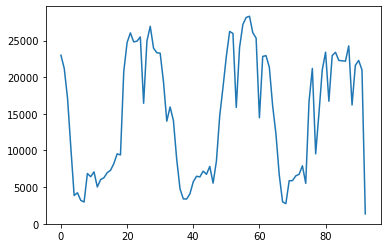

In [528]:
plt.plot(nn.predict(clean21))  

In [530]:
rrr=pd.DataFrame(nn.predict(clean21))

In [531]:
rrr.to_csv('full_trained_segment2_new.csv')

In [532]:
nn.predict(clean21)

array([23006.30529446, 21210.33897437, 17132.7383806 , 10375.83966803,
        3856.77924335,  4229.35723701,  3192.06609113,  2967.57692112,
        6856.99342354,  6422.8504672 ,  7077.73007984,  5023.44049233,
        6029.06622934,  6280.54912221,  6975.63366566,  7292.08784077,
        8217.30473609,  9534.3523227 ,  9402.47106289, 20791.89267631,
       24721.94127517, 26047.7555306 , 24820.88608795, 24918.15684428,
       25493.53773159, 16441.30229314, 24941.6349409 , 26944.95647633,
       23959.43786632, 23340.87680375, 23274.46096694, 19376.9667104 ,
       14001.79146922, 15939.97391755, 14100.76611601,  8796.38467141,
        4769.72766972,  3384.81985113,  3377.54798223,  4083.07888683,
        5726.47945819,  6481.92244678,  6391.16350936,  7183.45607119,
        6749.87101514,  7827.78039393,  5544.13485348,  8538.58324979,
       14717.65491882, 18657.41926752, 22834.91124012, 26245.85074936,
       25972.71356107, 15881.38865465, 24067.43036931, 27201.53822016,
      